<a href="https://colab.research.google.com/github/MushfiqurRashid/ML-Practice-Classification-/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [6]:
print(X_train)

[[ 1.8925893   1.52189404]
 [ 0.1250379   0.03213212]
 [ 0.9106163  -1.31157471]
 [-1.34792161 -1.48684082]
 [-0.169554   -0.58129926]
 [-0.56234321  2.33980255]
 [ 1.0088136  -1.19473064]
 [-0.75873781  1.08372877]
 [ 2.1871812  -1.04867555]
 [ 0.0268406  -0.25997806]
 [-0.46414591 -1.1363086 ]
 [ 0.1250379   0.03213212]
 [ 1.6961947  -0.90262046]
 [ 1.1070109  -0.90262046]
 [ 0.5178271   1.22978386]
 [-1.05332971 -1.4576298 ]
 [-1.15152701 -1.54526286]
 [-0.0713567   0.67477452]
 [ 0.4196298  -0.46445519]
 [-0.2677513  -0.25997806]
 [-0.85693511  0.14897619]
 [ 0.0268406   0.29503128]
 [ 0.7142217  -1.28236369]
 [ 1.5979974   1.11293979]
 [ 0.812419   -1.36999675]
 [-1.44611891 -1.22394166]
 [-0.0713567   0.14897619]
 [ 0.4196298  -0.14313399]
 [-0.2677513   0.03213212]
 [ 1.3034055   2.22295848]
 [ 0.1250379   0.76240757]
 [-1.34792161  0.55793045]
 [ 1.9907866   0.73319655]
 [-1.24972431 -1.39920777]
 [ 0.3214325  -0.3184001 ]
 [-0.95513241  0.55793045]
 [ 0.4196298   0.29503128]
 

In [7]:
print(X_train)

[[ 1.8925893   1.52189404]
 [ 0.1250379   0.03213212]
 [ 0.9106163  -1.31157471]
 [-1.34792161 -1.48684082]
 [-0.169554   -0.58129926]
 [-0.56234321  2.33980255]
 [ 1.0088136  -1.19473064]
 [-0.75873781  1.08372877]
 [ 2.1871812  -1.04867555]
 [ 0.0268406  -0.25997806]
 [-0.46414591 -1.1363086 ]
 [ 0.1250379   0.03213212]
 [ 1.6961947  -0.90262046]
 [ 1.1070109  -0.90262046]
 [ 0.5178271   1.22978386]
 [-1.05332971 -1.4576298 ]
 [-1.15152701 -1.54526286]
 [-0.0713567   0.67477452]
 [ 0.4196298  -0.46445519]
 [-0.2677513  -0.25997806]
 [-0.85693511  0.14897619]
 [ 0.0268406   0.29503128]
 [ 0.7142217  -1.28236369]
 [ 1.5979974   1.11293979]
 [ 0.812419   -1.36999675]
 [-1.44611891 -1.22394166]
 [-0.0713567   0.14897619]
 [ 0.4196298  -0.14313399]
 [-0.2677513   0.03213212]
 [ 1.3034055   2.22295848]
 [ 0.1250379   0.76240757]
 [-1.34792161  0.55793045]
 [ 1.9907866   0.73319655]
 [-1.24972431 -1.39920777]
 [ 0.3214325  -0.3184001 ]
 [-0.95513241  0.55793045]
 [ 0.4196298   0.29503128]
 

In [8]:
print(y_train)

[1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0
 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0]


In [9]:
print(y_test)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1]


## Training the Logistic Regression model on the Training set

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [11]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [12]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]]


## Making the Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[61  2]
 [12 25]]


0.86

## Visualising the Training set results

<ipython-input-14-81475a10d23e>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)


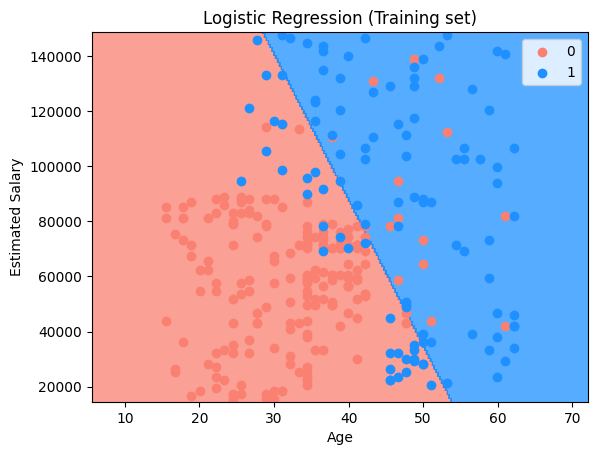

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

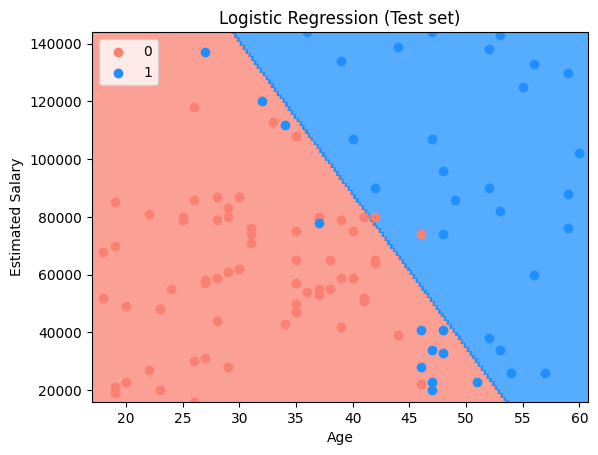

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
# Create a grid of points
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25)
)
# Predict for each point on the grid
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Define colors for scatter plot
colors = ['#FA8072', '#1E90FF']
# Plot the test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=colors[i], label=j
    )
# Add titles and labels
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()